# How to Normalize Data in Python

## Learning Objectives
Part of the objective of data preparation, is to transform our data in order to make it more suitable for machine learning. During this step, we often have to restructure some of our data so that it conforms to a particular characteristic. This is known as **normalization** or **standardization**. There are several ways to normalize data in Python. By the end of the tutorial, you will have learned:

+ how to perform min-max normalization
+ how to perform z-score normalization

In [1]:
import pandas as pd
vehicles = pd.read_csv("vehicles.csv")
vehicles.head()

,citympg,cylinders,displacement,drive,highwaympg,make,model,class,year,transmissiontype,transmissionspeeds,co2emissions
0,14.0,6,4.1,2-Wheel Drive,19.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,555.437500
1,14.0,8,5.0,2-Wheel Drive,20.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,555.437500
2,18.0,8,5.7,2-Wheel Drive,26.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,484.761905
3,21.0,6,4.3,Rear-Wheel Drive,31.0,Cadillac,Fleetwood/DeVille (FWD),Large Cars,1984,Automatic,4,424.166667
4,14.0,8,4.1,Rear-Wheel Drive,19.0,Cadillac,Brougham/DeVille (RWD),Large Cars,1984,Automatic,4,555.437500


In [6]:
vehicles[['co2emissions']].describe()

,co2emissions
count,36979.000000
mean,476.550703
std,117.791357
min,29.000000
25%,400.000000
50%,467.736842
75%,555.437500
max,1269.571429


<Axes: ylabel='Frequency'>

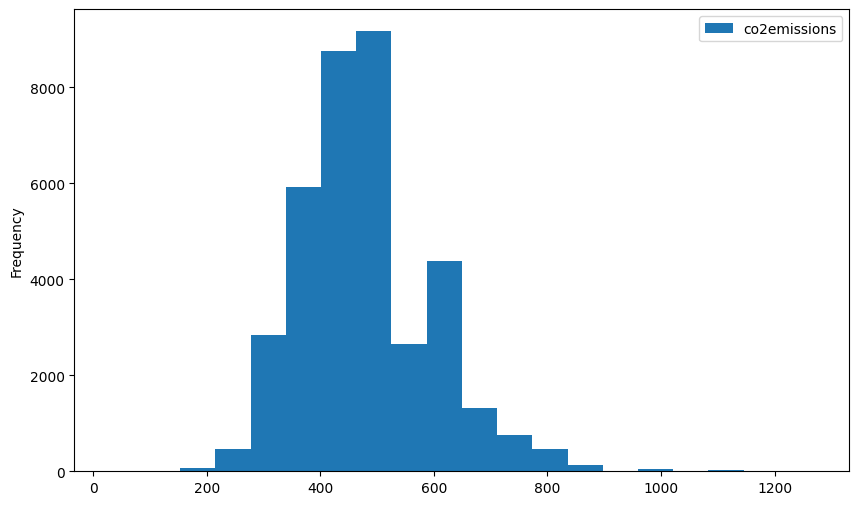

In [2]:
%matplotlib inline
vehicles[['co2emissions']].plot(kind = 'hist', 
                                bins = 20, 
                                figsize = (10, 6))

## How to perform min-max Normalization

In [8]:
%pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler, StandardScaler

   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/8.9 MB 7.1 MB/s eta 0:00:02
   ----------- ---------------------------- 2.6/8.9 MB 7.2 MB/s eta 0:00:01
   ----------------- ---------------------- 3.9/8.9 MB 6.9 MB/s eta 0:00:01
   ----------------------- ---------------- 5.2/8.9 MB 6.6 MB/s eta 0:00:01
   --------------------------- ------------ 6.0/8.9 MB 6.1 MB/s eta 0:00:01
   --------------------------------- ------ 7.3/8.9 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 6.3 MB/s  0:00:01

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   -------------------------- ------------- 2/3 [scikit-lea

In [9]:
co2_emissions = MinMaxScaler().fit_transform(vehicles[['co2emissions']])
co2_emissions

array([[0.42435082],
       [0.42435082],
       [0.36738062],
       ...,
       [0.38208199],
       [0.50944265],
       [0.41674344]])

In [12]:
co2_emissions_df = pd.DataFrame(co2_emissions, columns = ['co2emissions'])
display(co2_emissions_df)

,co2emissions
0,0.424351
1,0.424351
2,0.367381
3,0.318536
4,0.424351
...,...
36974,0.332911
36975,0.352257
36976,0.382082
36977,0.509443


In [14]:
co2_emissions_df.describe()

,co2emissions
count,36979.000000
mean,0.360762
std,0.094949
min,0.000000
25%,0.299056
50%,0.353657
75%,0.424351
max,1.000000


<Axes: ylabel='Frequency'>

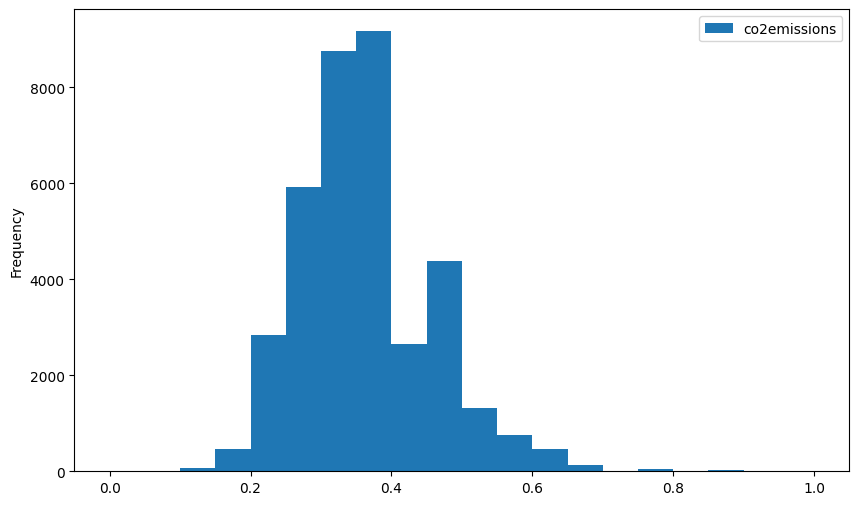

In [16]:
co2_emissions_df.plot(kind = 'hist', 
                     bins = 20, 
                     figsize = (10, 6))

## How to perform z-score Normalization

In [17]:
from sklearn.preprocessing import StandardScaler


In [18]:
co2emissions_zm = StandardScaler().fit_transform(vehicles[['co2emissions']])
co2emissions_zm = pd.DataFrame(co2emissions_zm, columns = ['co2emissions'])
co2emissions_zm.describe()

,co2emissions
count,3.697900e+04
mean,-1.844617e-16
std,1.000014e+00
min,-3.799572e+00
25%,-6.498927e-01
50%,-7.482706e-02
75%,6.697254e-01
max,6.732510e+00


<Axes: ylabel='Frequency'>

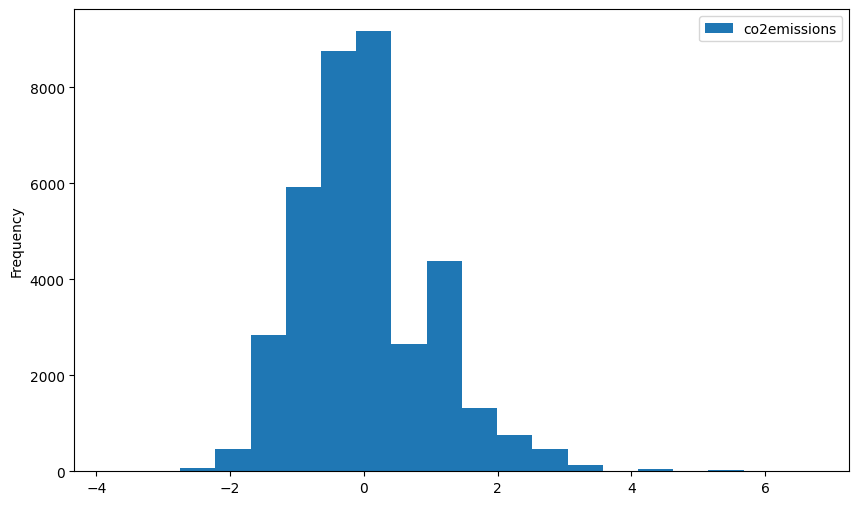

In [19]:
co2emissions_zm.plot(kind = 'hist', 
                     bins = 20, 
                     figsize = (10, 6))